In [26]:
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
import warnings
from graphviz import *
warnings.filterwarnings('ignore')

In [16]:
data=pd.read_csv('../data/StressLevelDataset.csv')
data_sd=pd.read_csv('StressLevelDataset.csv')
X=data.iloc[:,:20]
Y=data.iloc[:,20].values
ros=RandomOverSampler(random_state=42)
x_resampled,y_resampled= ros.fit_resample(X,Y)
rus = RandomUnderSampler(random_state=42)
x_rus_resampled, y_rus_resampled = rus.fit_resample(X, Y)



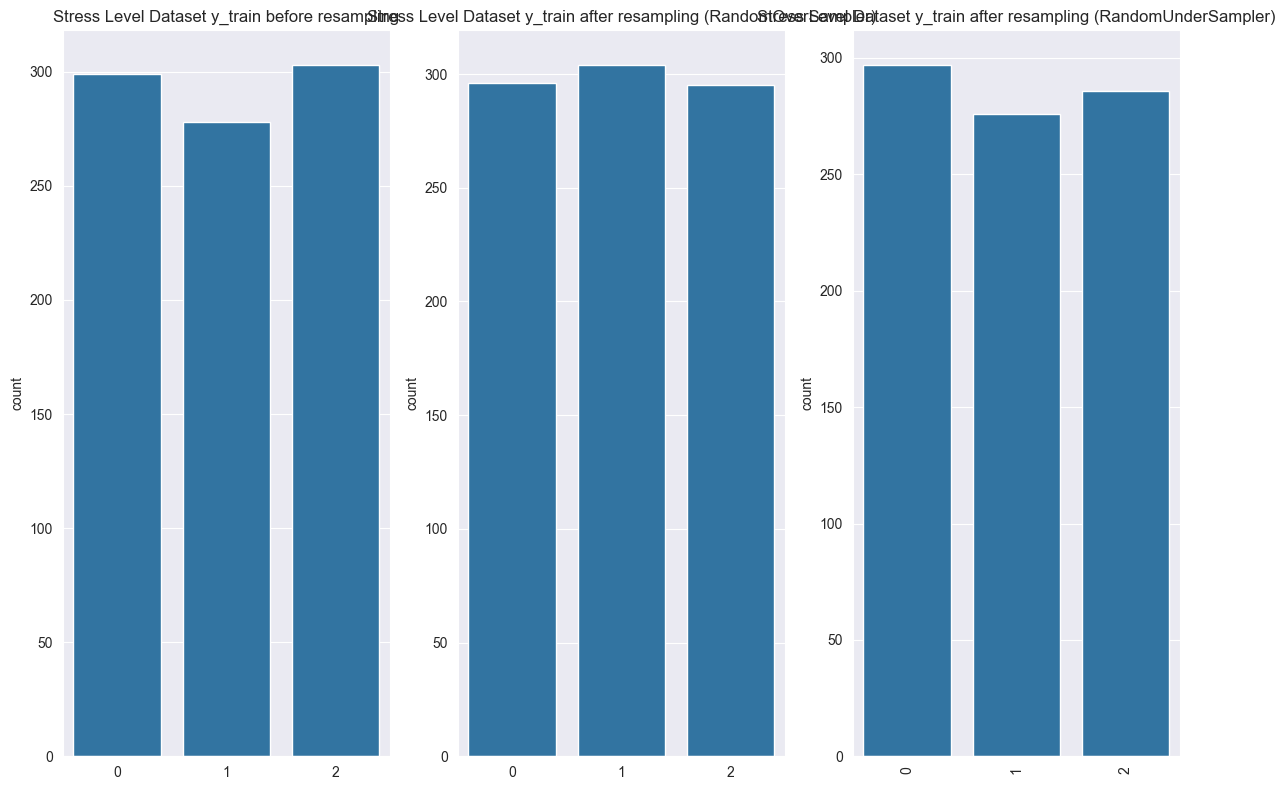

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
x_train_resam,x_test_res,y_train_resam,y_test_res=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=0)
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus_resampled,y_rus_resampled,test_size=0.2,random_state=0)
fig,(ax1,ax2,ax3) =plt.subplots(1,3,figsize=(12,8))
sns.countplot(x=y_train,ax=ax1)
ax1.set_title('Stress Level Dataset y_train before resampling')
plt.xticks(rotation=90)
ros=RandomOverSampler(random_state=42)
ax2.set_title('Stress Level Dataset y_train after resampling (RandomOverSampler)')
sns.countplot(x=y_train_resam,ax=ax2)
ax3.set_title('Stress Level Dataset y_train after resampling (RandomUnderSampler)')
sns.countplot(x=y_train_rus,ax=ax3)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [18]:
xgb_train = xgb.DMatrix(x_train,y_train)
xgb_test = xgb.DMatrix(x_test,y_test)
#resampled
xgb_train_resam = xgb.DMatrix(x_train_resam,y_train_resam)
xgb_test_resam = xgb.DMatrix(x_test_res,y_test_res)
#unersampled
xgb_rus_train=xgb.DMatrix(x_train_rus,y_train_rus)
xgb_rus_test=xgb.DMatrix(x_test_rus,y_test_rus)

In [19]:
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'eta': 0.1,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1,
    'alpha': 0.1,
    'nthread': -1,
    'seed': 42
}
n=50
model=xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)
model_resampled=xgb.train(params=params,dtrain=xgb_train_resam,num_boost_round=n)
model_rus=xgb.train(params=params,dtrain=xgb_rus_train,num_boost_round=n)

In [20]:
preds=model.predict(xgb_test)
preds=np.round(preds)
accuracy=accuracy_score(y_test,preds)
print('Accuracy before resampling:',accuracy*100,'%')
preds_res=model_resampled.predict(xgb_test_resam)
preds_res=np.round(preds_res)
accuracy_res=accuracy_score(y_test_res,preds_res)
print('Accuracy after resampling (Oversampling) :',accuracy_res*100,'%')
preds_rus=model_rus.predict(xgb_rus_test)
preds_rus=np.round(preds_rus)
accuracy_res=accuracy_score(y_test_rus,preds_rus)
print('Accuracy after resampling (Undesampling) :',accuracy_res*100,'%')

Accuracy before resampling: 89.0909090909091 %
Accuracy after resampling (Oversampling) : 87.94642857142857 %
Accuracy after resampling (Undesampling) : 88.83720930232558 %


In [21]:
print(model.get_score(importance_type='gain'))
print('-'*50)
model.get_dump()

{'anxiety_level': 3.02520489692688, 'self_esteem': 2.018108606338501, 'mental_health_history': 0.940395176410675, 'depression': 1.7887566089630127, 'headache': 3.1901602745056152, 'blood_pressure': 21.643455505371094, 'sleep_quality': 19.24712371826172, 'breathing_problem': 1.0645145177841187, 'noise_level': 2.0046167373657227, 'living_conditions': 0.8830093741416931, 'safety': 9.705025672912598, 'basic_needs': 7.514557838439941, 'academic_performance': 2.7136728763580322, 'study_load': 1.5867847204208374, 'teacher_student_relationship': 1.7846425771713257, 'future_career_concerns': 5.1956257820129395, 'social_support': 6.580856800079346, 'peer_pressure': 1.0652036666870117, 'extracurricular_activities': 3.6474645137786865, 'bullying': 2.7906627655029297}
--------------------------------------------------


['0:[basic_needs<4] yes=1,no=2,missing=2\n\t1:[noise_level<2] yes=3,no=4,missing=4\n\t\t3:[safety<1] yes=7,no=8,missing=8\n\t\t\t7:[noise_level<1] yes=13,no=14,missing=14\n\t\t\t\t13:leaf=-0.0385714322\n\t\t\t\t14:leaf=0.0385714285\n\t\t\t8:[self_esteem<4] yes=15,no=16,missing=16\n\t\t\t\t15:leaf=-0\n\t\t\t\t16:leaf=0.086307697\n\t\t4:[anxiety_level<9] yes=9,no=10,missing=10\n\t\t\t9:[peer_pressure<3] yes=17,no=18,missing=18\n\t\t\t\t17:leaf=-0.0477049239\n\t\t\t\t18:leaf=0.0439726003\n\t\t\t10:[headache<2] yes=19,no=20,missing=20\n\t\t\t\t19:leaf=0.0170769207\n\t\t\t\t20:leaf=-0.0722871423\n\t2:[blood_pressure<3] yes=5,no=6,missing=6\n\t\t5:leaf=0.148211181\n\t\t6:[mental_health_history<1] yes=11,no=12,missing=12\n\t\t\t11:[breathing_problem<3] yes=21,no=22,missing=22\n\t\t\t\t21:leaf=-0.0247826129\n\t\t\t\t22:leaf=0.0379999988\n\t\t\t12:[academic_performance<2] yes=23,no=24,missing=24\n\t\t\t\t23:leaf=-0\n\t\t\t\t24:leaf=0.0929268301\n',
 '0:[blood_pressure<2] yes=1,no=2,missing=2\n\

In [35]:
output_dir = '../stress level output/trees eg'
os.makedirs(output_dir, exist_ok=True)
for i in range(15):
    xgb.plot_tree(model,num_trees=i)
    print(f'saving tree {i+1}.png')
    plt.savefig(f'{output_dir}/tree{i+1}.png',dpi=300,bbox_inches='tight')
    plt.close()

saving tree 1.png
saving tree 2.png
saving tree 3.png
saving tree 4.png
saving tree 5.png
saving tree 6.png
saving tree 7.png
saving tree 8.png
saving tree 9.png
saving tree 10.png
saving tree 11.png
saving tree 12.png
saving tree 13.png
saving tree 14.png
saving tree 15.png


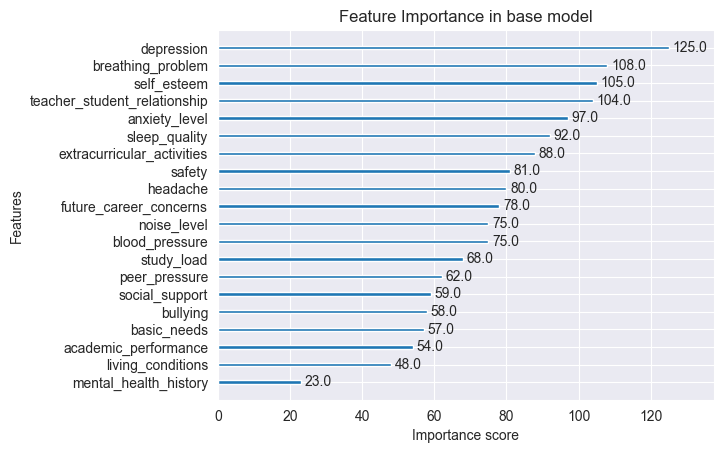

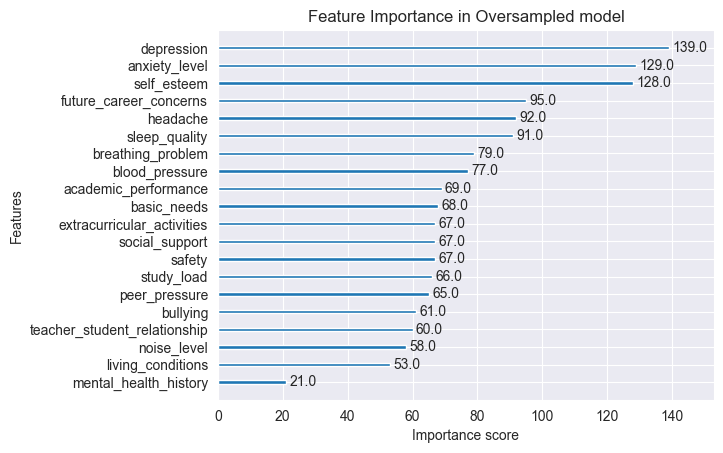

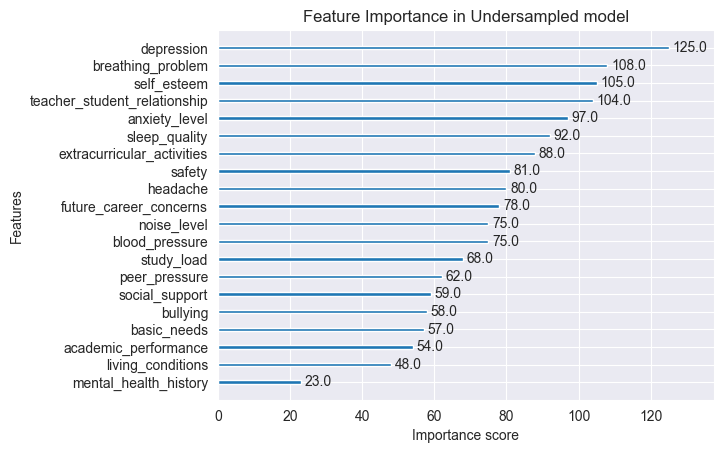

In [32]:
output_dir='../stress level output/features importance'
os.makedirs(output_dir, exist_ok=True)
models=[(model,'base'),(model_resampled,'Oversampled'),(model_rus,'Undersampled')]
for model,name in models:
    xgb.plot_importance(model,title= f'Feature Importance in {name} model')
    plt.savefig(f'{output_dir}/importance {name}.png',dpi=300,bbox_inches='tight')